<a href="https://colab.research.google.com/github/Mino94/samsung_electronics_stock_prediction/blob/main/samsung_stock_datavisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 삼성전자 주식 예측 하기 (데이터 시각화)

>> 출처 : https://sosoeasy.tistory.com/332 

In [1]:
# # google colab 사용
# from google.colab import files
# uploaded = files.upload()

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime 

In [3]:
start = datetime(2009, 1, 2)
end = datetime(2021, 1, 11)
df  = pd.read_csv('./005930KS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2009-01-02,9070.0,9400.0,8850.0,9400.0,1.705819,22978400.0
1,2009-01-05,9600.0,9740.0,9470.0,9520.0,1.727595,30460450.0
2,2009-01-06,9640.0,10040.0,9590.0,9960.0,1.807442,45072450.0
3,2009-01-07,10100.0,10480.0,9980.0,10480.0,1.901807,41286200.0
4,2009-01-08,10360.0,10380.0,10060.0,10160.0,1.843736,30614600.0
...,...,...,...,...,...,...,...
2967,2021-01-05,81600.0,83900.0,81600.0,83900.0,83900.000000,35335669.0
2968,2021-01-06,83300.0,84500.0,82100.0,82200.0,82200.000000,42089013.0
2969,2021-01-07,82800.0,84200.0,82700.0,82900.0,82900.000000,32644642.0
2970,2021-01-08,83300.0,90000.0,83000.0,88800.0,88800.000000,59013307.0


In [4]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [5]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [6]:
df.describe

<bound method NDFrame.describe of             Date     Open     High      Low    Close     Adj Close      Volume
0     2009-01-02   9070.0   9400.0   8850.0   9400.0      1.705819  22978400.0
1     2009-01-05   9600.0   9740.0   9470.0   9520.0      1.727595  30460450.0
2     2009-01-06   9640.0  10040.0   9590.0   9960.0      1.807442  45072450.0
3     2009-01-07  10100.0  10480.0   9980.0  10480.0      1.901807  41286200.0
4     2009-01-08  10360.0  10380.0  10060.0  10160.0      1.843736  30614600.0
...          ...      ...      ...      ...      ...           ...         ...
2967  2021-01-05  81600.0  83900.0  81600.0  83900.0  83900.000000  35335669.0
2968  2021-01-06  83300.0  84500.0  82100.0  82200.0  82200.000000  42089013.0
2969  2021-01-07  82800.0  84200.0  82700.0  82900.0  82900.000000  32644642.0
2970  2021-01-08  83300.0  90000.0  83000.0  88800.0  88800.000000  59013307.0
2971  2021-01-11  90000.0  96800.0  89500.0  91000.0  91000.000000  89406371.0

[2972 rows x 7 co

#### x-N일 부터 x일 까지의 평균을 "x일의 N일 이동평균선이라고 한다." 주식값 예측에 중요한 역할을 한다.

**단기이동평균선**이 **장기이동평균선**을 넘으면 "골든크로스: 라고 한다.

**장기이동평균선**이 **단기이동평균선**을 넘으면 "데드크로스"라고 한다

- 이동평균선을 구하기위해서 pandas.Series.rolling을 알아야 한다. 일정 범위에서 규칙적으로 연산을 해야할 경우 사용

In [7]:
ma5 = df['Adj Close'].rolling(window=5).mean()
ma20 = df['Adj Close'].rolling(window=20).mean()
ma60 = df['Adj Close'].rolling(window=60).mean()
ma120 = df['Adj Close'].rolling(window=120).mean()

df.insert(len(df.columns), "MA5", ma5)
df.insert(len(df.columns), "MA20", ma20)
df.insert(len(df.columns), "MA60", ma60)
df.insert(len(df.columns), "MA120", ma120)


In [8]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,MA60,MA120
0,2009-01-02,9070.0,9400.0,8850.0,9400.0,1.705819,22978400.0,NaN,NaN,NaN,NaN
1,2009-01-05,9600.0,9740.0,9470.0,9520.0,1.727595,30460450.0,NaN,NaN,NaN,NaN
2,2009-01-06,9640.0,10040.0,9590.0,9960.0,1.807442,45072450.0,NaN,NaN,NaN,NaN
3,2009-01-07,10100.0,10480.0,9980.0,10480.0,1.901807,41286200.0,NaN,NaN,NaN,NaN
4,2009-01-08,10360.0,10380.0,10060.0,10160.0,1.843736,30614600.0,1.79728,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2967,2021-01-05,81600.0,83900.0,81600.0,83900.0,83900.000000,35335669.0,80980.00000,75295.0,66701.666667,61886.666667
2968,2021-01-06,83300.0,84500.0,82100.0,82200.0,82200.000000,42089013.0,81680.00000,75830.0,67076.666667,62132.500000
2969,2021-01-07,82800.0,84200.0,82700.0,82900.0,82900.000000,32644642.0,82600.00000,76330.0,67451.666667,62378.333333
2970,2021-01-08,83300.0,90000.0,83000.0,88800.0,88800.000000,59013307.0,84160.00000,77185.0,67916.666667,62670.000000


In [9]:
# 거래량을 이용한 이동평균선 계산, 추가
vma5 = df['Volume'].rolling(window=5).mean()
df.insert(len(df.columns), "VMA5", vma5)

In [10]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,MA60,MA120,VMA5
0,2009-01-02,9070.0,9400.0,8850.0,9400.0,1.705819,22978400.0,NaN,NaN,NaN,NaN,NaN
1,2009-01-05,9600.0,9740.0,9470.0,9520.0,1.727595,30460450.0,NaN,NaN,NaN,NaN,NaN
2,2009-01-06,9640.0,10040.0,9590.0,9960.0,1.807442,45072450.0,NaN,NaN,NaN,NaN,NaN
3,2009-01-07,10100.0,10480.0,9980.0,10480.0,1.901807,41286200.0,NaN,NaN,NaN,NaN,NaN
4,2009-01-08,10360.0,10380.0,10060.0,10160.0,1.843736,30614600.0,1.79728,NaN,NaN,NaN,34082420.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2967,2021-01-05,81600.0,83900.0,81600.0,83900.0,83900.000000,35335669.0,80980.00000,75295.0,66701.666667,61886.666667,34766571.8
2968,2021-01-06,83300.0,84500.0,82100.0,82200.0,82200.000000,42089013.0,81680.00000,75830.0,67076.666667,62132.500000,35167365.6
2969,2021-01-07,82800.0,84200.0,82700.0,82900.0,82900.000000,32644642.0,82600.00000,76330.0,67451.666667,62378.333333,35628404.2
2970,2021-01-08,83300.0,90000.0,83000.0,88800.0,88800.000000,59013307.0,84160.00000,77185.0,67916.666667,62670.000000,41547581.4


In [11]:
pd.to_datetime(df['Date'], format='%Y-%m-%d')
# 0      2020-01-07
# 1      2020-01-06
# 2      2020-01-03
# 3      2020-01-02
# 4      2019-12-30

df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df['Year'] =df['Date'].dt.year
df['Month'] =df['Date'].dt.month
df['Day'] =df['Date'].dt.day

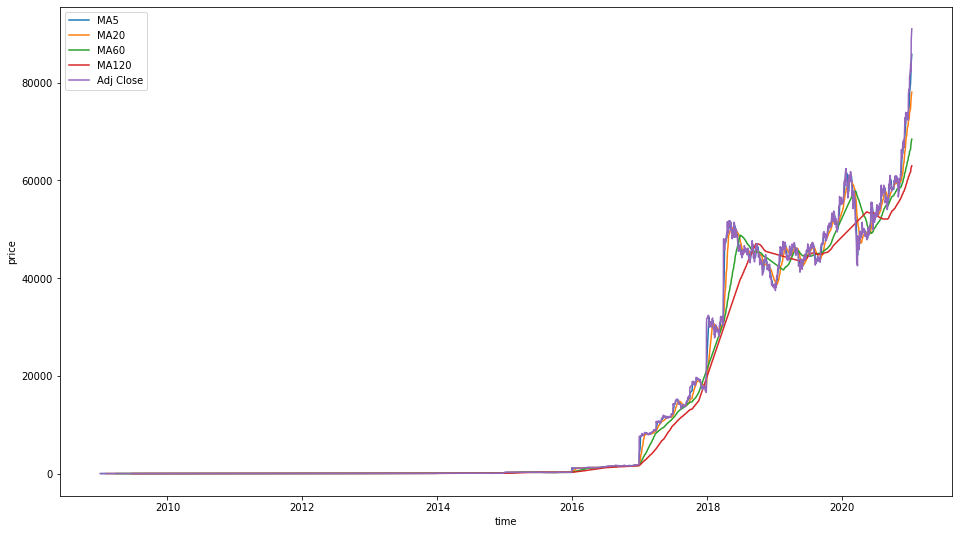

In [12]:
df = df.loc[df['Year']>=1990]

plt.figure(figsize=(16, 9))
sns.lineplot(x=df['Date'], y=df['MA5'], label="MA5")
sns.lineplot(x=df['Date'], y=df['MA20'], label="MA20")
sns.lineplot(x=df['Date'], y=df['MA60'], label="MA60")
sns.lineplot(x=df['Date'], y=df['MA120'], label="MA120")

sns.lineplot(y=df['Adj Close'], x=df['Date'], label='Adj Close')
plt.legend(loc='best')
plt.xlabel('time')
plt.ylabel('price')
plt.show();

**주가 변동율 추가 및 시각화**

In [13]:
# x일 행에 x+1일의 종가를 추가
df['tomorrow Adj Close']= df['Adj Close'].shift(-1)

# 변동율 측정 => ((다음날종가)-(오늘종가))/오늘종가 
df['Fluctuation']= df['tomorrow Adj Close']-df['Adj Close']
df['Fluctuation Rate']= df['Fluctuation']/df['Adj Close']
df

,Date,Open,High,Low,Close,Adj Close,Volume,MA5,MA20,MA60,MA120,VMA5,Year,Month,Day,tomorrow Adj Close,Fluctuation,Fluctuation Rate
0,2009-01-02,9070.0,9400.0,8850.0,9400.0,1.705819,22978400.0,NaN,NaN,NaN,NaN,NaN,2009,1,2,1.727595,0.021776,0.012766
1,2009-01-05,9600.0,9740.0,9470.0,9520.0,1.727595,30460450.0,NaN,NaN,NaN,NaN,NaN,2009,1,5,1.807442,0.079847,0.046219
2,2009-01-06,9640.0,10040.0,9590.0,9960.0,1.807442,45072450.0,NaN,NaN,NaN,NaN,NaN,2009,1,6,1.901807,0.094365,0.052209
3,2009-01-07,10100.0,10480.0,9980.0,10480.0,1.901807,41286200.0,NaN,NaN,NaN,NaN,NaN,2009,1,7,1.843736,-0.058071,-0.030535
4,2009-01-08,10360.0,10380.0,10060.0,10160.0,1.843736,30614600.0,1.79728,NaN,NaN,NaN,34082420.0,2009,1,8,1.789295,-0.054441,-0.029528
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2967,2021-01-05,81600.0,83900.0,81600.0,83900.0,83900.000000,35335669.0,80980.00000,75295.0,66701.666667,61886.666667,34766571.8,2021,1,5,82200.000000,-1700.000000,-0.020262
2968,2021-01-06,83300.0,84500.0,82100.0,82200.0,82200.000000,42089013.0,81680.00000,75830.0,67076.666667,62132.500000,35167365.6,2021,1,6,82900.000000,700.000000,0.008516
2969,2021-01-07,82800.0,84200.0,82700.0,82900.0,82900.000000,32644642.0,82600.00000,76330.0,67451.666667,62378.333333,35628404.2,2021,1,7,88800.000000,5900.000000,0.071170
2970,2021-01-08,83300.0,90000.0,83000.0,88800.0,88800.000000,59013307.0,84160.00000,77185.0,67916.666667,62670.000000,41547581.4,2021,1,8,91000.000000,2200.000000,0.024775


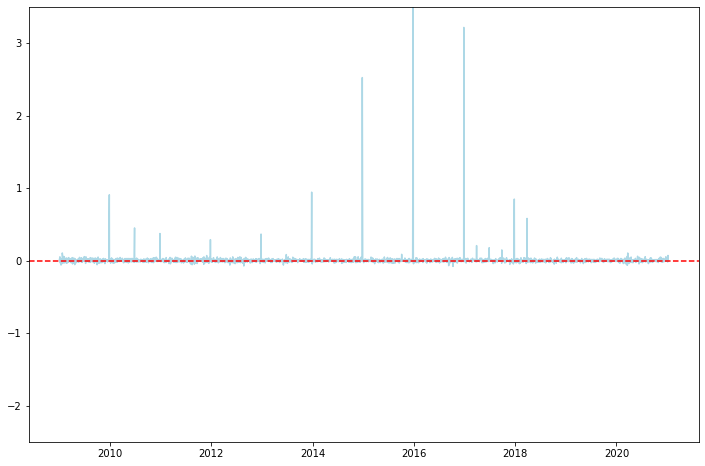

In [14]:
plt.figure(figsize=(12,8)) 
plt.plot(df['Date'],df['Fluctuation Rate'], color = 'lightblue')
# sns.lineplot(data=df, x="Date", y="Fluctuation Rate", palette='lightblue')
plt.ylim(-2.5,3.5)
plt.axhline( y = 0, color = 'red', ls = '--') #기준선추가
plt.show()

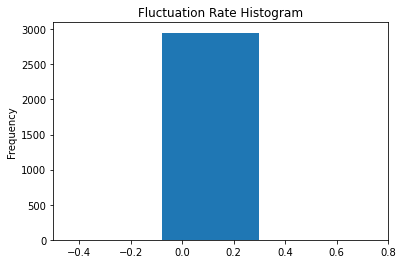

In [25]:
df['Fluctuation Rate'].plot.hist()
plt.title('Fluctuation Rate Histogram');
plt.xlim(-0.5, 0.8)
plt.show();

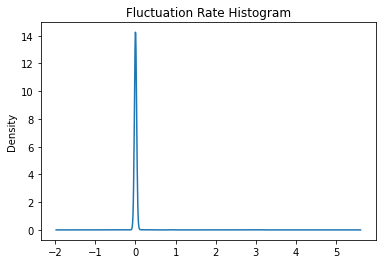

In [27]:
# 커널 밀도함수
df['Fluctuation Rate'].plot.kde()
plt.title('Fluctuation Rate Histogram')
plt.show();

In [28]:
# !pip install https://github.com/matplotlib/mpl_finance/archive/master.zip

     |████████████████████████████████| 307kB 4.0MB/s 
  Created wheel for mpl-finance: filename=mpl_finance-0.10.1-cp36-none-any.whl size=8422 sha256=f4b1854a938dc3135cc9daf05a2747557006e5b9770557e300e40131605f280a
  Stored in directory: /tmp/pip-ephem-wheel-cache-kg8j5rf2/wheels/8f/bf/8a/6c858b2a3be945c7b2d658fbf6ab797b451d686cbee8aa2679
Successfully built mpl-finance


In [29]:
from mpl_finance import candlestick2_ohlc
import matplotlib.pyplot as plt

#matplotlib에서 x축과 y축에 표시되는 값을 ticker라 함
import matplotlib.ticker as ticker 
import matplotlib.dates as mdates
import numpy as np

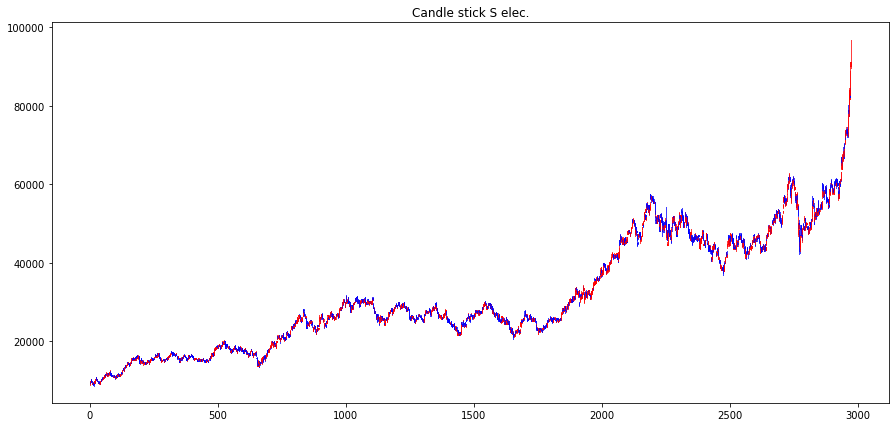

In [30]:
#차트와 피규어 그리기 준비 및 크기 설정
fig, ax = plt.subplots(figsize=(15,7)) 

# 시고저종 데이터를 통해 캔들 차트를 그리기 (순서를 반드시 시고저종으로 입력)
candlestick2_ohlc(ax,df['Open'],df['High'],df['Low'],df['Close'],width=0.6, colorup='r', colordown='b')

# 차트 타이틀 설정
plt.title('Candle stick S elec.')
plt.show()

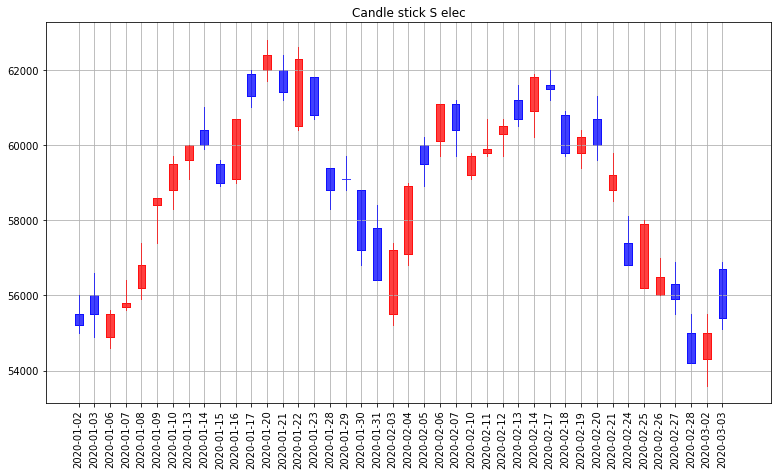

In [40]:
import pandas_datareader.data as wb

start = datetime(2020,1,1) #시작날짜 
end = datetime(2020,3,2) #끝 날짜df = wb.DataReader('005930.KS', 'yahoo' , start, end)
df2 = wb.DataReader('005930.KS', 'yahoo',start,end)

#다시 차트 그리기
fig, ax = plt.subplots(figsize=(13,7)) 

#x축의 눈금을 설정
day_list = []
name_list = []
for i, day in enumerate(df2.index):    
    day_list.append(i) # 고정 축 list 생성
    name_list.append(day.strftime('%Y-%m-%d')) # 고정 축에 적힐 날짜 list 생성
ax.xaxis.set_major_locator(ticker.FixedLocator(day_list)) #day_list를 받아서 리스트 안의 값의 위치에 고정 축 생성
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list)) #설정한 고정 축에 name_list 안의 값을 축에 출력

candlestick2_ohlc(ax,df2['Open'],df2['High'],df2['Low'],df2['Close'], width=0.5, colorup='r', colordown='b')

plt.xticks(rotation = 90) #x축 각도 회전
#fig.autofmt_xdate() #날짜 형식으로 자동 format 지정
plt.title('Candle stick S elec')
plt.grid()
plt.show()

### Normalization

딥러닝 모델이 학습을 잘하기 위해서 정규화 해주는 작업.

sklearn 패키지에 있는 MinMaxScaler를 활용하여 전체 학습 데이터를 Normalize한다.

MinMaxScaler를 해주면 전체 데이터는 0, 1사이의 값을 갖도록 해줍니다.

In [16]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scale_cols = ['Open',	'High',	'Low','Close',	'Volume']
# df_scaled = scaler.fit_transform(df[scale_cols])

# df_scaled = pd.DataFrame(df_scaled)
# df_scaled.columns = scale_cols
# print(df_scaled)

**학습을 시킬 데이터 셋 생성**

위의 함수는 정해진 window_size에 기반하여 20일 기간의 데이터 셋을 묶어 주는 역할을 합니다.

즉, 순차적으로 20일 동안의 데이터 셋을 묶고, 이에 맞는 label (예측 데이터)와 함께 return해 줍니다.

In [17]:
# TEST_SIZE = 200
# WINDOW_SIZE = 20

# train = df_scaled[:-TEST_SIZE]
# test = df_scaled[-TEST_SIZE:]

# def make_dataset(data, label, window_size=20):
#     feature_list = []
#     label_list = []
#     for i in range(len(data) - window_size):
#         feature_list.append(np.array(data.iloc[i:i+window_size]))
#         label_list.append(np.array(label.iloc[i+window_size]))
#     return np.array(feature_list), np.array(label_list)

In [18]:

# from sklearn.model_selection import train_test_split

# feature_cols = ['Open',	'High',	'Low','Volume']
# label_cols = ['Close']

# train_feature = train[feature_cols]
# train_label = train[label_cols]

# train_feature, train_label = make_dataset(train_feature, train_label, 20)

# x_train, x_valid, y_train, y_valid = train_test_split(train_feature, train_label, test_size=0.2)
# x_train.shape, x_valid.shape

# test_feature = test[feature_cols]
# test_label = test[label_cols]

# test_feature.shape, test_label.shape

# test_feature, test_label = make_dataset(test_feature, test_label, 20)
# test_feature.shape, test_label.shape

In [19]:
# from keras.models import Sequential
# from keras.layers import Dense
# from keras.callbacks import EarlyStopping, ModelCheckpoint
# from keras.layers import LSTM

# model = Sequential()
# model.add(LSTM(16, 
#                input_shape=(train_feature.shape[1], train_feature.shape[2]), 
#                activation='relu', 
#                return_sequences=False)
#           )

# model.add(Dense(1))

In [20]:
# import os
# from os.path import join  

# model.compile(loss='mean_squared_error', optimizer='adam')
# early_stop = EarlyStopping(monitor='val_loss', patience=5)

# model_path = 'model'
# filename = os.path.join(model_path, 'tmp_checkpoint.h5')
# checkpoint = ModelCheckpoint(filename, monitor='val_loss', verbose=1, save_best_only=True, mode='auto')

# history = model.fit(x_train, y_train, 
#                     epochs=200, 
#                     batch_size=16,
#                     validation_data=(x_valid, y_valid), 
#                     callbacks=[early_stop, checkpoint])


In [21]:
# !pip install -q pyyaml h5py

In [22]:
# from google.colab import drive

# pred = model.predict(test_feature)
# model.load_weights(filename)

# pred.shape

In [23]:
# plt.figure(figsize=(12, 9))
# plt.plot(test_label, label = 'actual')
# plt.plot(pred, label = 'prediction')
# plt.legend()
# plt.show()